In [22]:
full_filepath = '/Users/assel2/Documents/ML_coursera/machine-learning-ex1/ex1/ex1data1.txt'

import numpy as np

raw_data = np.loadtxt(full_filepath, delimiter = ',')
#print(raw_data)
X_vec = raw_data[:,0]
y_vec = raw_data[:,1]

X = X_vec.reshape(-1,1)
y = y_vec.reshape(-1,1)
X.shape

print('m is the number of training examples and there is',X.size,'of those')

m is the number of training examples and there is 97 of those


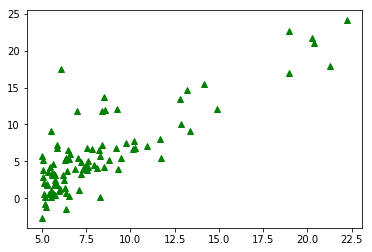

In [111]:
import matplotlib.pyplot as plt

data_plot= plt.plot(X[:,1],y,'g^')


In [23]:
X_0 = np.ones(X.shape)
X = np.concatenate((X_0,X),1)
#print(X)

In [81]:
#setting the learning rate and initialising theta

alpha = 0.01
num_iter = 1500
theta = np.zeros((2,1))
const = 2*(X.shape[0])
const = 1/const
print(theta)
print(const)

[[0.]
 [0.]]
0.005154639175257732


In [25]:
def costFunc(X,y,theta) :
    hx = np.dot(X,theta)
    hx = hx - y
    hx = np.square(hx)
    hx = sum(hx)
   # print(hx)
    hx = const*hx
    J = hx
    return J

cost = costFunc(X,y,theta)

print('with theta that equals ',theta,', the cost is ',cost,' ')

theta_1 = np.array([[-1],[2]])
print(theta_1)
cost_1 = costFunc(X,y,theta_1)

print('with theta that equals ',theta_1,', the cost is ',cost_1,'')

with theta that equals  [[0.]
 [0.]] , the cost is  [32.07273388]  
[[-1]
 [ 2]]
with theta that equals  [[-1]
 [ 2]] , the cost is  [54.24245508] 


In [91]:

J_hist = np.array([])
def gradientDescent(X,y,theta,alpha,num_iter,J_hist):
    const_1 = alpha *(1/X.shape[0])
    for i in range(num_iter):
        h = np.dot(X,theta)
        h = h - y
       
        errors= np.transpose(X)
        errors = np.dot(errors,h)
        #print(errors.shape)
        #print(h.shape)

        theta_change= errors*const_1;
        theta= theta-theta_change;
       
        J = costFunc(X,y,theta);
        J_hist = np.append(J_hist,J)
    return J_hist, theta

hj, theta= gradientDescent(X,y,theta,alpha,num_iter,J_hist)
print(theta)

[[-3.87805118]
 [ 1.1912525 ]]


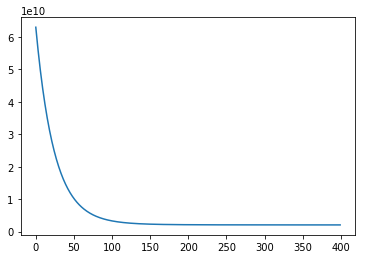

In [434]:
plt.plot(range(len(hj)), hj)

In [20]:
J_hist = []
J = 1
for x in range(3):
    J = J+1
    J_hist.append(J)
    print(J)

print(J_hist)

2
3
4
[2, 3, 4]


In [103]:
test1 = np.array([1,3.5])
predict1 = np.dot(test1,theta)
print('For the population of 35000 this is the prediction of price',predict1*10000,'')
test2 = np.array([1,7])
predict2 = np.dot(test2,theta)
print('For the population of 70000 this is the prediction of price',predict2*10000,'')


For the population of 350000 this is the prediction of price [2913.32586101] 
For the population of 70000 this is the prediction of price [44607.16347252] 


In [203]:
print(theta)

[[-3.87805118]
 [ 1.1912525 ]]


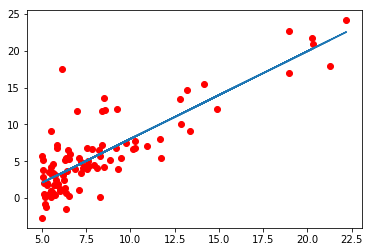

In [135]:
plt.scatter(X[:,1],y,color = 'red')
bi = np.dot(X,theta)
plt.plot(X[:,1],bi)

In [175]:
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)

J_vals = np.zeros([len(theta0_vals),len(theta1_vals)])
#print(J_vals.shape)
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [theta0_vals[i]], [theta1_vals[j]]
        J_vals[i,j] = costFunc(X, y, t)
#print(J_vals)

g1,g2 = np.meshgrid(theta0_vals,theta1_vals)


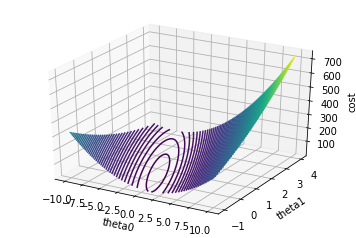

In [181]:
from mpl_toolkits.mplot3d import Axes3D
fig2 = plt.figure()
ax = plt.axes(projection = '3d')
ax.contour3D(g1, g2, J_vals,100, cmap='viridis')
#ax.view_init(60, 35)

ax.set_title = 'The changes to the J(theta) with the changes to theta 1 and theta 2'
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('cost', rotation = '90');

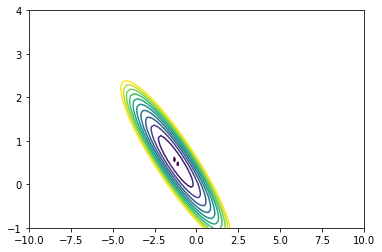

In [202]:
levels = np.arange(-10,10,0.5)
fig, ax = plt.subplots()
CS = ax.contour(g1, g2, J_vals, levels=levels)

In [337]:
#multi variable assignment 
full_filepath = '/Users/assel2/Documents/ML_coursera/machine-learning-ex1/ex1/ex1data2.txt'

raw_data = np.loadtxt(full_filepath, delimiter = ',')
X_vec = raw_data[:,0:2] #remember slicing go to -1 for the second slice element 
y_vec = raw_data[:,2]

X = X_vec.reshape(-1,2)
y = y_vec.reshape(-1,1)
m = len(y)

In [354]:
#feature normalisatiion for X
def featureNorm(X):
    X_norm = np.array(X)
    mu = np.mean(X_norm, axis = 0);
    #mu = mu.reshape(-1,1)

    sigma = np.std(X_norm, axis = 0);
    #sigma = sigma.reshape(-1,1)

    X_norm = X_norm - mu
   
    X_norm = X_norm/sigma;
    return X_norm,mu

X_normalised, mu = featureNorm(X)
#print(X_normalised)
#type(X_normalised)

In [387]:
X_ones = np.ones([m,1])
X_normalised = np.array(X_normalised)
#type(X_normalised)
X_normalised = X_normalised.reshape(-1,2)
#print(X_normalised.shape)
#print(X_ones.shape)
X =np.concatenate((X_ones,X_normalised), axis=1)

In [426]:
theta = np.zeros([3,1])
def costFuncMulti(X,y,theta):
    hx1 = np.dot(X,theta)
    hx1 = hx1-y
    hx1 = np.transpose(hx1)

    hx2 = np.dot(X,theta)
    hx2 = hx2 -y
    #print(hx2)
   

    hx= np.dot(hx1,hx2);
 
    #print(hx)
    hx = np.sum(hx, axis = 0);

    J = 1/(2*m)*hx;
    #print(J)
    return J

k = costFuncMulti(X,y,theta)
#print(costFuncMulti(X,y,theta))

[6.55915481e+10]


In [430]:
J_hist = np.array([])
alpha = 0.02
num_iter = 400
theta = np.zeros([3,1])
def gradientDescent(X,y,theta,alpha,num_iter,J_hist):
    const_1 = alpha *(1/X.shape[0])
    for i in range(num_iter):
        h = np.dot(X,theta)
        h = h - y
       
        errors= np.transpose(X)
        errors = np.dot(errors,h)
        #print(errors.shape)
        #print(h.shape)

        theta_change= errors*const_1;
        theta= theta-theta_change;
        #print(theta)
        k = costFuncMulti(X,y,theta)
        #print(k)
        J_hist = np.append(J_hist,k)
        
    return J_hist, theta

hj, theta= gradientDescent(X,y,theta,alpha,num_iter,J_hist)
#print(theta)
#print(hj)

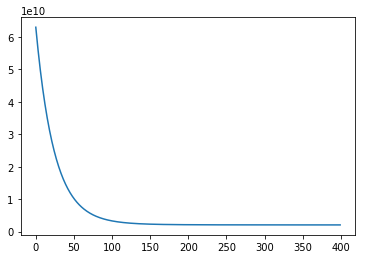

In [433]:
plt.plot(range(len(hj)), hj)

In [440]:
#implimenting the normal equation 

a = np.transpose(X)
a = np.dot(a,X)

a_inv = np.linalg.inv(a)
b = np.transpose(X)
b= np.dot(b,y)

solution_normEq = np.dot(a_inv,b);
theta_normeq= solution_normEq
print('This is the theta as derived by using the normal equation method',theta_normeq,'')
print('This is the theta as derived by using the gradient decent method ',theta,'')


This is the theta as derived by using the normal equation method [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]] 
This is the theta as derived by using the gradient decent method  [[340307.35772969]
 [107757.47433209]
 [ -4888.35338493]] 
